<a href="https://colab.research.google.com/github/etarazonav/650044-ABD-ULIMA/blob/main/Notebooks/ABD_RDD_Ejemplos_Soluciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Universidad_de_Lima_logo.png/220px-Universidad_de_Lima_logo.png"  width="120" /> Ejemplos de análisis de datos usando Spark RDDs
**Profesor:** Enver G. Tarazona Vargas <br>
**Curso:** Analítica con Big Data <br>
**FACULTAD DE INGENIERÍA - CARRERA DE INGENIERÍA DE SISTEMAS**<br>

In [ ]:
!pip install -q pyspark

In [ ]:
sc.stop()

In [ ]:
from pyspark import SparkContext
sc = SparkContext("local[1]", "ejemplos_analisis_rdd")

Se descargará los archivos que se requiere para estos ejemplos. Alternativamente, pueden ser cargados manualmente. Si se trabaja en un clúster, estos archivos deberían encontrarse en el clúster, por ejemplo de HDFS, y se debe brindar la ruta hacia los archivos.

In [ ]:
!wget -q https://raw.githubusercontent.com/etarazonav/650044-ABD-ULIMA/refs/heads/main/Datos/texto-prueba.txt
!wget -q https://raw.githubusercontent.com/etarazonav/650044-ABD-ULIMA/refs/heads/main/Datos/DowJones19.csv
!wget -q https://raw.githubusercontent.com/etarazonav/650044-ABD-ULIMA/refs/heads/main/Datos/u.data
!wget -q https://raw.githubusercontent.com/etarazonav/650044-ABD-ULIMA/refs/heads/main/Datos/ventas_rdd.csv
!wget -q https://raw.githubusercontent.com/etarazonav/650044-ABD-ULIMA/refs/heads/main/Datos/detalles_rdd.csv
!wget -q https://raw.githubusercontent.com/etarazonav/650044-ABD-ULIMA/refs/heads/main/Datos/clientes_rdd.csv
!wget -q https://raw.githubusercontent.com/etarazonav/650044-ABD-ULIMA/refs/heads/main/Datos/productos_rdd.csv
!wget -q https://raw.githubusercontent.com/etarazonav/650044-ABD-ULIMA/refs/heads/main/Datos/ventas2_rdd.csv

### **Ejemplo 1: Procesamiento de Texto con RDDs en Apache Spark**

**Objetivo**:

El objetivo de este ejercicio es procesar un archivo de texto utilizando Apache Spark y sus RDDs (Resilient Distributed Datasets). A través de varias transformaciones, se trabajará con el contenido del archivo, convirtiendo las líneas en palabras, eliminando palabras comunes (stopwords), filtrando por letras iniciales, eliminando duplicados y almacenando los resultados.

**Enunciado**:

1. **Carga del archivo de texto**: Carga el archivo `texto-prueba.txt` en un RDD utilizando Apache Spark y verifica que todas las líneas se almacenen correctamente en el RDD.

2. **Transformación de líneas a minúsculas y separación de palabras**: Transforma el RDD para que cada línea del archivo se convierta en minúsculas y se divida en una lista de palabras separadas por espacios. Utiliza una función lambda para realizar esta operación.

3. **Definición de una función personalizada**: Implementa una función definida por el usuario que realice la misma transformación de conversión a minúsculas y separación de palabras, y aplícala al RDD original para generar un nuevo RDD transformado.

4. **Almacenamiento del RDD transformado**: Guarda el RDD transformado en una carpeta denominada `salida`, utilizando la función `saveAsTextFile` de Spark.

5. **Transformación con `flatMap`**: Aplica la función `flatMap` para que cada palabra de cada línea sea un elemento individual en el RDD. Muestra las primeras 10 palabras del RDD resultante utilizando la función `take()`.

6. **Filtrado de palabras comunes (stopwords)**: Define una lista de stopwords que deben ser eliminadas del RDD. Aplica un filtro para eliminar todas las palabras que se encuentren en dicha lista.

7. **Filtrado de palabras por la letra inicial**: Filtra el RDD para que queden solo las palabras que comiencen con la letra "s", utilizando la función `startswith()`.

8. **Eliminación de duplicados**: Asegúrate de que el RDD no contenga palabras duplicadas utilizando la función `distinct()`.

9. **Almacenamiento de los resultados finales**: Almacena el RDD filtrado y sin duplicados en una carpeta llamada `salida_final`, utilizando `saveAsTextFile` para guardar los resultados en un archivo de texto.



In [ ]:
# Lectura del archivo
rdd = sc.textFile("texto-prueba.txt")
rdd.collect()

['Este es un texto de prueba',
 'Para utilizar algunas Funcionalidades de Spark',
 'Usaremos Spark con Python',
 'Spark puede usar Python o Scala',
 'Es posible Usar otros lenguajes como Java O R',
 'En este caso usaremos Python']

In [ ]:
# Separar por palabras en cada línea
rdd.map(lambda x: x.lower().split(' ')).collect()

[['este', 'es', 'un', 'texto', 'de', 'prueba'],
 ['para', 'utilizar', 'algunas', 'funcionalidades', 'de', 'spark'],
 ['usaremos', 'spark', 'con', 'python'],
 ['spark', 'puede', 'usar', 'python', 'o', 'scala'],
 ['es', 'posible', 'usar', 'otros', 'lenguajes', 'como', 'java', 'o', 'r'],
 ['en', 'este', 'caso', 'usaremos', 'python']]

In [ ]:
# Similar a la función lambda anterior, pero usando una función con nombre
def funcion1(x):
  y = x.lower()
  z = y.split(' ')
  return z

rdd2 = rdd.map(funcion1)
rdd2.collect()

[['este', 'es', 'un', 'texto', 'de', 'prueba'],
 ['para', 'utilizar', 'algunas', 'funcionalidades', 'de', 'spark'],
 ['usaremos', 'spark', 'con', 'python'],
 ['spark', 'puede', 'usar', 'python', 'o', 'scala'],
 ['es', 'posible', 'usar', 'otros', 'lenguajes', 'como', 'java', 'o', 'r'],
 ['en', 'este', 'caso', 'usaremos', 'python']]

In [ ]:
# Filtrar los RDDs donde aparece la palabra Python
rdd2.filter(lambda x: "python" in x).collect()

[['usaremos', 'spark', 'con', 'python'],
 ['spark', 'puede', 'usar', 'python', 'o', 'scala'],
 ['en', 'este', 'caso', 'usaremos', 'python']]

In [ ]:
# Almacenar un RDD (se especifica el nombre de la carpeta)
rdd2.saveAsTextFile("/content/salida")

In [ ]:
# Dividir las palabras sin estructura ("flat")
rdd3 = rdd.flatMap(lambda x: x.lower().split())
# Mostrar solo las 10 primeras
rdd3.take(10)

['este',
 'es',
 'un',
 'texto',
 'de',
 'prueba',
 'para',
 'utilizar',
 'algunas',
 'funcionalidades']

In [ ]:
# Palabras que se eliminará
stop_words = ["este", "de", "es", "un"]
# Filtraje: mantener solo las palabras que no estén en "stop_words"
rdd4 = rdd3.filter(lambda x: x not in stop_words)

#rdd4.distinct().collect()
rdd4.collect()

['texto',
 'prueba',
 'para',
 'utilizar',
 'algunas',
 'funcionalidades',
 'spark',
 'usaremos',
 'spark',
 'con',
 'python',
 'spark',
 'puede',
 'usar',
 'python',
 'o',
 'scala',
 'posible',
 'usar',
 'otros',
 'lenguajes',
 'como',
 'java',
 'o',
 'r',
 'en',
 'caso',
 'usaremos',
 'python']

In [ ]:
# Se desea solo las palabras que comienzan con s
rdd5 = rdd3.filter(lambda x: x.startswith('s'))
rdd5.collect()

['spark', 'spark', 'spark', 'scala']

In [ ]:
# Quedarse solo con los elementos que son diferentes
rdd5.distinct().collect()

['spark', 'scala']

### **Ejemplo 2: Agrupación de Palabras por Primera Letra en Apache Spark**

**Objetivo**:

El objetivo de este ejercicio es procesar un archivo de texto y agrupar las palabras por su primera letra utilizando Apache Spark. Esta operación es útil para organizar grandes volúmenes de datos de manera eficiente y facilitar análisis posteriores, como la búsqueda de patrones o la categorización de palabras. Al agrupar las palabras por su primera letra, estarás creando una estructura de datos organizada que permite identificar fácilmente las palabras que comienzan con cada letra del alfabeto, lo que puede ser valioso en tareas de análisis léxico o de procesamiento de lenguaje natural.

**Enunciado**:

1. **Carga del archivo de texto**: Carga el archivo `texto-prueba.txt` en un RDD utilizando Apache Spark y verifica que las líneas se almacenen correctamente.

2. **Transformación de líneas a palabras**: Utiliza la función `flatMap` para convertir cada línea en una lista de palabras. Asegúrate de que todas las palabras se conviertan a minúsculas.

3. **Conteo del número de elementos en el RDD**: Calcula el número total de palabras en el RDD utilizando la función `count()`.

4. **Agrupación por primera letra**: Agrupa las palabras del RDD según la primera letra de cada palabra utilizando la función `groupBy`. Esta agrupación facilita el análisis léxico y la identificación de palabras en función de su inicial.

5. **Conversión de grupos a listas**: Convierte los grupos de palabras (iterables) a listas para poder visualizar el contenido de cada grupo.

Asegúrate de utilizar las funciones `flatMap`, `count`, `groupBy`, y `mapValues` de Spark para realizar las operaciones solicitadas. Los resultados deben agruparse correctamente y ser legibles.



In [ ]:
rdd0 = sc.textFile("texto-prueba.txt")
rdd = rdd0.flatMap(lambda x: x.lower().split(' '))
rdd.take(10)

['este',
 'es',
 'un',
 'texto',
 'de',
 'prueba',
 'para',
 'utilizar',
 'algunas',
 'funcionalidades']

In [ ]:
# Número de elementos en el RDD
rdd.count()

36

In [ ]:
# Agrupar según primera letra
rdd2 = rdd.groupBy(lambda x: x[0])
rdd2.collect()

[('e', <pyspark.resultiterable.ResultIterable at 0x79af8db48370>),
 ('u', <pyspark.resultiterable.ResultIterable at 0x79af8db48310>),
 ('t', <pyspark.resultiterable.ResultIterable at 0x79af8db4b640>),
 ('d', <pyspark.resultiterable.ResultIterable at 0x79af8db4a350>),
 ('p', <pyspark.resultiterable.ResultIterable at 0x79af8db4b250>),
 ('a', <pyspark.resultiterable.ResultIterable at 0x79af8db48e20>),
 ('f', <pyspark.resultiterable.ResultIterable at 0x79af8db467d0>),
 ('s', <pyspark.resultiterable.ResultIterable at 0x79af8db466b0>),
 ('c', <pyspark.resultiterable.ResultIterable at 0x79af8db47190>),
 ('o', <pyspark.resultiterable.ResultIterable at 0x79af8db458d0>),
 ('l', <pyspark.resultiterable.ResultIterable at 0x79af8db47d00>),
 ('j', <pyspark.resultiterable.ResultIterable at 0x79af8db456c0>),
 ('r', <pyspark.resultiterable.ResultIterable at 0x79af8db44f40>)]

In [ ]:
# Convertir en lista los valores que son iterables (para poder mostrarlos)
rdd2.mapValues(list).collect()

[('e', ['este', 'es', 'es', 'en', 'este']),
 ('u', ['un', 'utilizar', 'usaremos', 'usar', 'usar', 'usaremos']),
 ('t', ['texto']),
 ('d', ['de', 'de']),
 ('p', ['prueba', 'para', 'python', 'puede', 'python', 'posible', 'python']),
 ('a', ['algunas']),
 ('f', ['funcionalidades']),
 ('s', ['spark', 'spark', 'spark', 'scala']),
 ('c', ['con', 'como', 'caso']),
 ('o', ['o', 'otros', 'o']),
 ('l', ['lenguajes']),
 ('j', ['java']),
 ('r', ['r'])]

In [ ]:
# Similar al anterior, pero usando herramientas nativas de Python
[(k, list(v))  for (k, v) in rdd2.collect()]

[('e', ['este', 'es', 'es', 'en', 'este']),
 ('u', ['un', 'utilizar', 'usaremos', 'usar', 'usar', 'usaremos']),
 ('t', ['texto']),
 ('d', ['de', 'de']),
 ('p', ['prueba', 'para', 'python', 'puede', 'python', 'posible', 'python']),
 ('a', ['algunas']),
 ('f', ['funcionalidades']),
 ('s', ['spark', 'spark', 'spark', 'scala']),
 ('c', ['con', 'como', 'caso']),
 ('o', ['o', 'otros', 'o']),
 ('l', ['lenguajes']),
 ('j', ['java']),
 ('r', ['r'])]

### **Ejemplo 3: Análisis de Calificaciones en Apache Spark**

**Objetivo**:

El objetivo de este ejercicio es procesar un archivo de calificaciones de usuarios, analizar las frecuencias de dichas calificaciones y visualizarlas mediante un gráfico de barras. Aprenderás a extraer información relevante de los datos, contar la frecuencia de elementos en un RDD y generar representaciones gráficas de los resultados.

**Formato del archivo**:  
El archivo `u.data` contiene cuatro columnas separadas por tabulaciones:
- `user_id`: Identificador del usuario.
- `item_id`: Identificador del ítem (película o producto).
- `rating`: Calificación del ítem por parte del usuario.
- `timestamp`: Marca de tiempo cuando se realizó la calificación.

**Enunciado**:

1. **Carga del archivo de calificaciones**: Carga el archivo `u.data` en un RDD utilizando Apache Spark. Visualiza las primeras tres líneas del archivo para verificar que los datos se han cargado correctamente.

2. **Separación de las líneas en columnas**: Utiliza la función `map` para dividir cada línea del archivo en columnas, utilizando los espacios como delimitador.

3. **Extracción de las calificaciones**: Extrae el tercer elemento de cada línea (que corresponde a la calificación) y almacénalo en un nuevo RDD llamado `ratings`.

4. **Conteo de las frecuencias**: Utiliza la función `countByValue` para contar cuántas veces se repite cada calificación en el RDD.

5. **Visualización de las frecuencias**: Imprime los resultados obtenidos y genera un gráfico de barras que muestre la frecuencia de cada calificación.

6. **Ordenación de las calificaciones**: Ordena las calificaciones por su valor y convierte el resultado en un diccionario ordenado para su visualización final.

Asegúrate de utilizar las funciones de Spark adecuadas (`map`, `countByValue`) para realizar las operaciones solicitadas. Utiliza `matplotlib` para generar el gráfico de barras y presenta los resultados de manera ordenada.


In [ ]:
rdd = sc.textFile("u.data")
rdd.take(3)

['196\t242\t3\t881250949', '186\t302\t3\t891717742', '22\t377\t1\t878887116']

In [ ]:
# Separar cada línea a partir de las tabulaciones
rdd.map(lambda x: x.split('\t')).take(3)
#rdd.map(lambda x: x.split()).take(3)

[['196', '242', '3', '881250949'],
 ['186', '302', '3', '891717742'],
 ['22', '377', '1', '878887116']]

In [ ]:
# Separar cada línea y tomar solo el elemento 3 (con índice 2) que correponde a los "ratings"
ratings = rdd.map(lambda x: x.split('\t')[2])
ratings.take(3)

['3', '3', '1']

In [ ]:
# Contar el número de veces que se repite cada elemento del RDD ("frecuencia")
resultado = ratings.countByValue()
resultado

defaultdict(int, {'3': 27145, '1': 6110, '2': 11370, '4': 34174, '5': 21201})

In [ ]:
# Mostrar los valores en un iterable
for k, v in resultado.items():
  print(k, v)

3 27145
1 6110
2 11370
4 34174
5 21201


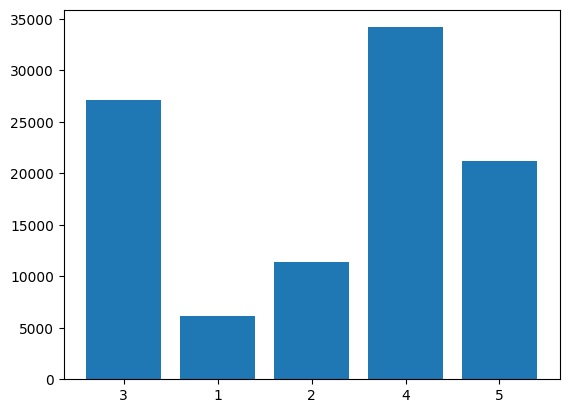

In [ ]:
# Gráfico de barras
import matplotlib.pyplot as plt

plt.bar(resultado.keys(), resultado.values())
plt.show()
# Notar que las claves no se encuentran ordenadas

In [ ]:
# Ordenar según las claves
ordenado = sorted(resultado.items())
print(ordenado)

[('1', 6110), ('2', 11370), ('3', 27145), ('4', 34174), ('5', 21201)]


In [ ]:
#Convertir a un diccionario ordenado
import collections

resultadoOrdenado = collections.OrderedDict(ordenado)
resultadoOrdenado

OrderedDict([('1', 6110),
             ('2', 11370),
             ('3', 27145),
             ('4', 34174),
             ('5', 21201)])

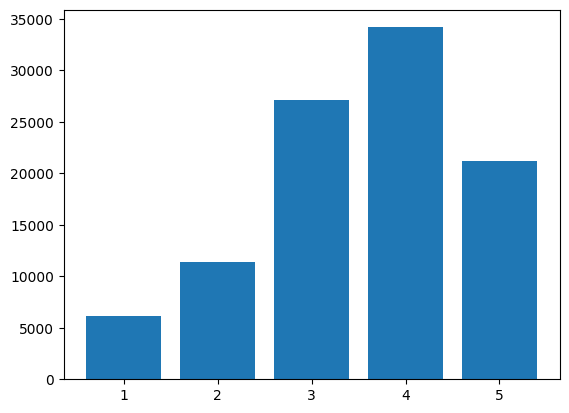

In [ ]:
# Gráfico de barras
import matplotlib.pyplot as plt

plt.bar(resultadoOrdenado.keys(), resultadoOrdenado.values())
plt.show()

### Tupla con nombre

In [ ]:
from collections import namedtuple

# Tupla con nombre llamada "Tupla"
Tupla = namedtuple("Tupla", ["nombre1", "nombre2"])

# Creación de una tupla
t = Tupla(40, 25)
t

In [ ]:
# Acceso al primer elemento de la tupa
print(t[0])          # Usando el índice
print(t.nombre2)     # Usando el nombre del elemento (similar a un atributo)

### **Ejemplo 4 - Análisis de Volúmenes y Fechas del Índice Dow Jones**

**Objetivo**:

El objetivo de este ejercicio es procesar un archivo CSV que contiene datos históricos del índice Dow Jones. Se estructurarán las filas del archivo en tuplas con nombre, se calcularán los volúmenes totales de transacciones agrupados por mes, y se identificarán los cinco meses con mayor volumen. Finalmente, los resultados serán formateados y almacenados en un archivo de salida.

**Descripción del archivo**:  
El archivo `DowJones19.csv` contiene los siguientes campos, separados por comas:
- **Date**: Fecha de la transacción.
- **Open**: Precio de apertura del índice.
- **High**: Precio máximo del índice en ese día.
- **Low**: Precio mínimo del índice en ese día.
- **Close**: Precio de cierre del índice.
- **Adj_Close**: Precio de cierre ajustado.
- **Volume**: Volumen de transacciones en ese día.

**Instrucciones**:

1. Cargar el archivo `DowJones19.csv` en un RDD y eliminar la fila de la cabecera.
2. Extraer los nombres de las columnas para crear una tupla con nombre (`namedtuple`) que estructurará los datos de manera accesible.
3. Analizar las fechas presentes en el archivo, identificando la fecha mínima y la fecha máxima.
4. Calcular la suma total de los volúmenes de transacciones en todo el conjunto de datos.
5. Agrupar los datos por mes y calcular el volumen total de transacciones para cada mes.
6. Identificar los cinco meses con mayor volumen de transacciones.
7. Formatear los resultados y almacenarlos en un archivo de salida, asegurando que los datos se guarden en una única partición.

---


In [ ]:
# Lectura del archivo
f = sc.textFile("DowJones19.csv")

f.take(3)

In [ ]:
# Recuperar los nombres de la primera fila (como una lista)
header = f.first()
header

In [ ]:
header_list = header.split(",")
header_list

In [ ]:
header_list[5] = "Adj_Close"
header_list

In [ ]:
# Preprocesamiento: creación de una tupla con nombre para cada fila
# Requiere: from collections import namedtuple
Record = namedtuple("Record", header_list)

# Ejemplo de uso de tupla "Record"
tupla = Record('2014-10-27', 16796.099609,16836.980469,16729.830078,16817.939453,16817.939453,72580000)

print(tupla)
print("Campo Volumen:", tupla.Volume)

In [ ]:
# Eliminar la primera fila de los datos
f2 = f.filter(lambda x: x!= header)
f2.take(3)

In [ ]:
# Ejemplo de "parsing": separación de cada elemento del primer componente
elems = f2.first().split(',')
# print(elems)

# Creación de una tupla usando cada elemento por separado
tupla = Record(elems[0], float(elems[1]), float(elems[2]), float(elems[3]),
               float(elems[4]), float(elems[5]), float(elems[6]))
tupla

In [ ]:
# Creación de una tupla usando *map
tupla = Record(elems[0], *map(float, elems[1:]))
tupla

In [ ]:
# Convertir cada fila en una tupla con nombre
def parse(x):
  campos = x.split(",")
  return Record(campos[0], *map(float, campos[1:]))

# Apliar la función de conversión y almacenar en caché (persistencia de memoria)
datos = f2.map(parse).cache()
datos.take(3)

In [ ]:
# Mínima fecha
datos.map(lambda x: x.Date).min()

In [ ]:
# Máxima fecha
datos.map(lambda x: x.Date).max()

In [ ]:
# Suma de los volúmenes
datos.map(lambda x: x.Volume).sum()

In [ ]:
# Conversión a clave valor, donde la clave es el mes (y año)
# datos.map(lambda x: (x.Date[0:7], x.Volume)).take(3)
datos_mes = datos.map(lambda x: (x.Date[:7], x))
datos_mes.take(3)

In [ ]:
# Volúmenes de cada mes

# Reducir la tupla a (fecha, volumen)
datos_mes_volumen = datos_mes.mapValues(lambda x: x.Volume)
datos_mes_volumen.take(3)

In [ ]:
# Volúmen total de cada mes (reduce)
volumen_mes = datos_mes_volumen.reduceByKey(lambda x,y: x+y)
volumen_mes.take(5)

In [ ]:
# Volúmenes más altos por mes
volumen_mes.top(5, lambda x: x[1])

In [ ]:
# Asignar un formato a la salida y grabar
salida = volumen_mes.map(lambda x: ",".join(map(str,x)))
salida.take(3)

La línea de código anterior tiene la siguiente explicación:

1. **`volumen_mes.map(lambda x: ...)`**:
   - La variable `volumen_mes` es un RDD que contiene pares clave-valor, donde la clave es el mes y el valor es el volumen total de transacciones para ese mes.
   - `map` es una transformación de RDD que aplica una función a cada elemento del RDD. En este caso, está aplicando la función lambda (una función anónima) a cada tupla `(mes, volumen)` en `volumen_mes`.

2. **`lambda x: ",".join(map(str, x))`**:
   - La función lambda toma un argumento `x`, que es una tupla `(mes, volumen)`.
   - `map(str, x)` convierte cada elemento de la tupla en una cadena de texto. Es decir, si `x = ('2020-01', 15000)`, se convierte en `['2020-01', '15000']`.
   - `",".join(map(str, x))` convierte la lista de cadenas en una única cadena separada por comas. En el ejemplo anterior, la salida sería: `'2020-01,15000'`.


In [ ]:
# Almacenar (en una sola partición)
salida.repartition(1).saveAsTextFile("/content/salida_ejm4")

# Ejemplo 5: Uniendo RDDs con `join`, `leftOuterJoin`, y `rightOuterJoin`

Las operaciones de combinación son fundamentales en el procesamiento de datos para unir diferentes conjuntos de datos basados en claves comunes. PySpark proporciona varias funciones de combinación que permiten unir dos RDDs de formas variadas, dependiendo de los requerimientos del análisis:

- **`join`**: Combina dos RDDs donde la clave existe en ambos. El resultado es un RDD de pares clave-valor, donde cada valor es un par que contiene elementos de ambos RDDs para esa clave.
- **`leftOuterJoin`**: Combina dos RDDs pero mantiene todos los elementos del RDD de la izquierda, incluso si no hay una correspondencia en el RDD de la derecha. Los elementos del RDD derecho que no tienen una clave correspondiente en el RDD izquierdo aparecerán como `None`.
- **`rightOuterJoin`**: Similar al `leftOuterJoin`, pero mantiene todos los elementos del RDD de la derecha, y los elementos del RDD izquierdo sin correspondencia aparecerán como `None`.

Estas operaciones son esenciales para análisis donde se necesita integrar información de múltiples fuentes para obtener una vista más completa o para realizar comparaciones y análisis basados en datos agregados de varias tablas o fuentes de datos.

### Ejemplo 5.1
Consideremos un escenario donde tenemos dos conjuntos de datos: uno con información de ventas de productos y otro con detalles de los productos. Queremos combinar estos datos para obtener un informe completo que incluya el nombre del producto y sus ventas.

Los datos de ventas de productos consisten en pares de (producto_id, ventas), y los detalles de los productos en pares de (producto_id, nombre_producto). Nuestro objetivo es usar la función `join` para combinar estos dos RDDs por `producto_id` y así obtener un informe que relacione cada producto con sus respectivas ventas.


In [ ]:
# Datos de ventas de productos (producto_id, ventas)
ventas_rdd = sc.parallelize([(1, 100), (2, 80), (3, 50)])

# Datos de detalles de productos (producto_id, nombre_producto)
detalles_rdd = sc.parallelize([(1, "Smartphone"), (2, "Tablet"), (3, "Laptop")])

# Realizar un join para combinar los datos
productos_ventas = ventas_rdd.join(detalles_rdd)

# Recoger y mostrar los resultados
resultados = productos_ventas.collect()
print("Reporte de Ventas:")
for id, (ventas, nombre) in resultados:
    print(f"{nombre}: {ventas} unidades vendidas")


### Ejemplo 5.2
En este ejemplo, vamos a simular un entorno donde necesitamos cargar datos desde archivos externos. Supongamos que tenemos dos archivos: uno con ventas de productos y otro con detalles de los productos. Estos archivos están almacenados en formato CSV y queremos leer estos datos en RDDs, luego combinarlos para obtener un informe detallado que relacione las ventas con los nombres de los productos.

Los archivos están estructurados de la siguiente manera:
- **ventas_rdd.csv**: Contiene `producto_id` y `ventas`, separados por comas.
- **detalles_rdd.csv**: Contiene `producto_id` y `nombre_producto`, separados por comas.

El objetivo es leer estos archivos, crear RDDs correspondientes y usar la función `join` para combinar estos RDDs por `producto_id`. Este proceso simulará un análisis real donde se combinan datos de ventas y detalles del producto para generar informes útiles.

In [ ]:
# Leer los archivos en RDDs
# Suponiendo que los archivos están en el directorio actual donde se ejecuta PySpark
ventas_rdd = sc.textFile("ventas_rdd.csv")
detalles_rdd = sc.textFile("detalles_rdd.csv")

# Convertir las líneas de CSV a pares (producto_id, valor)
ventas_rdd = ventas_rdd.map(lambda line: line.split(",")).filter(lambda line: line[0] != "producto_id").map(lambda x: (int(x[0]), int(x[1])))
detalles_rdd = detalles_rdd.map(lambda line: line.split(",")).filter(lambda line: line[0] != "producto_id").map(lambda x: (int(x[0]), x[1]))

# Realizar un join para combinar los datos basados en producto_id
productos_ventas = ventas_rdd.join(detalles_rdd)

# Recoger y mostrar los resultados
resultados = productos_ventas.collect()
print("Reporte de Ventas Combinadas:")
for id, (ventas, nombre) in resultados:
    print(f"Producto: {nombre}, Ventas: {ventas} unidades")

### Ejemplo 5.3
Supongamos que estamos trabajando en un análisis para una empresa que desea entender mejor las tendencias de compra y las preferencias de sus clientes. Para ello, disponemos de tres conjuntos de datos: clientes, productos y ventas. Queremos combinar estos datos para obtener un informe detallado que relacione las ventas con los productos y los clientes.

- **clientes.csv**: Contiene `cliente_id`, `nombre`, y `region`.
- **productos.csv**: Contiene `producto_id`, `nombre_producto`, y `categoria`.
- **ventas2.csv**: Contiene `venta_id`, `cliente_id`, `producto_id`, y `cantidad`.

Nuestro objetivo es unir estos datos para crear un informe que muestre las preferencias de compra por región y categoría de producto, analizando las ventas y la distribución de los clientes.


In [ ]:
# Suponiendo que los archivos están en el directorio actual donde se ejecuta PySpark
# Leer los archivos en RDDs
clientes_rdd = sc.textFile("clientes_rdd.csv").map(lambda line: line.split(",")).filter(lambda line: line[0] != "cliente_id").map(lambda x: (int(x[0]), (x[1], x[2])))
productos_rdd = sc.textFile("productos_rdd.csv").map(lambda line: line.split(",")).filter(lambda line: line[0] != "producto_id").map(lambda x: (int(x[0]), (x[1], x[2])))
ventas_rdd = sc.textFile("ventas2_rdd.csv").map(lambda line: line.split(",")).filter(lambda line: line[0] != "venta_id").map(lambda x: (int(x[1]), (int(x[2]), int(x[3]))))

# Unir las ventas con los productos por producto_id
ventas_productos = ventas_rdd.map(lambda x: (x[1][0], (x[0], x[1][1]))) # re-map para producto_id como clave
venta_detalle_producto = ventas_productos.join(productos_rdd).map(lambda x: (x[1][0][0], (x[0], x[1][0][1], x[1][1][0], x[1][1][1]))) # remap para cliente_id como clave

# Unir los resultados con los clientes
venta_detalle_final = venta_detalle_producto.join(clientes_rdd)

# Recoger y mostrar los resultados
resultados = venta_detalle_final.collect()
print("Reporte Detallado de Ventas:")
for cliente, ((producto_id, cantidad, nombre_producto, categoria), (nombre_cliente, region)) in resultados:
    print(f"Cliente: {nombre_cliente}, Región: {region}, Producto: {nombre_producto}, Categoría: {categoria}, Cantidad: {cantidad}")

## **Ejercicios**

**Ejercicio 1**:
Dada una lista de precios de productos (por ejemplo, `[4.50, 2.75, 3.35, 5.80]`), crea un RDD y utiliza la función `map` para aplicar un aumento del 10% a cada precio. Recoge y muestra los resultados.

In [ ]:
# Lista de precios de productos
precios = [4.50, 2.75, 3.35, 5.80]

# Crear RDD a partir de la lista de precios
precios_rdd = sc.parallelize(precios)

# Aplicar un aumento del 10% a cada precio utilizando map
precios_actualizados_rdd = precios_rdd.map(lambda precio: precio * 1.10)

# Recoger y mostrar los resultados
precios_actualizados = precios_actualizados_rdd.collect()
print(precios_actualizados)

**Ejercicio 2**:
La gerencia de una cadena de supermercados ha solicitado a un analiista de datos un informe detallado sobre las ventas mensuales de varios productos para entender cuáles merecen una promoción. El objetivo es calcular el total de ventas por producto y aplicar un descuento del 5% a aquellos productos cuyas ventas superen los $100 en el mes, como parte de una estrategia para incentivar mayores ventas.

Para ello, en el último mes, se recopiló la siguiente información sobre las ventas de productos:

- Manzana: 150 unidades a $0.75 cada una.

- Banana: 300 unidades a $0.30 cada una.

- Naranja: 200 unidades a $0.50 cada una.

- Pera: 50 unidades a $1.25 cada una.

- Melón: 80 unidades a $3.50 cada una.

A partir de estos datos, en dónde cada registro de venta está representado como una tupla que contiene el nombre del producto, la cantidad vendida y el precio por unidad, realiza las siguientes actividades:

1. Construye un RDD con los datos de ventas que has preparado.
2. Utiliza la transformación `map` para calcular el total de ventas por producto, multiplicando la cantidad vendida por el precio por unidad.
3. Para los productos cuyo total de ventas exceda los $100, aplica un descuento del 5%.
4. Genera un informe final mostrando el nombre del producto, las ventas totales originales y las ventas totales después del descuento, si aplicó.

In [ ]:
# Datos de ejemplo proporcionados
datos_ventas = [
    ("Manzana", 150, 0.75),
    ("Banana", 300, 0.30),
    ("Naranja", 200, 0.50),
    ("Pera", 50, 1.25),
    ("Melón", 80, 3.50)
]

# Crear RDD a partir de los datos de ventas
ventas_rdd = sc.parallelize(datos_ventas)

# Calcular total de ventas por producto
total_ventas_rdd = ventas_rdd.map(lambda x: (x[0], x[1] * x[2]))

# Aplicar descuento del 5% a productos con ventas mayores a $100
descuento_ventas_rdd = total_ventas_rdd.map(lambda x: (x[0], x[1], x[1] * 0.95 if x[1] > 100 else x[1]))

# Recoger y mostrar los resultados
resultados_ventas = descuento_ventas_rdd.collect()
for resultado in resultados_ventas:
    print(f"Producto: {resultado[0]}, Venta Total: ${resultado[1]:.2f}, Después del Descuento: ${resultado[2]:.2f}")

**Ejercicio 3**: Un equipo editorial está revisando varios artículos para identificar las palabras clave más frecuentes y relevantes, pero quieren evitar palabras comunes y cortas que no aportan significado. Se te ha proporcionado un conjunto de datos que contiene múltiples frases de artículos. Tu tarea es extraer y listar las palabras que tienen cuatro letras o más, ya que el equipo considera que estas palabras podrían ser más relevantes para sus análisis.

Se han extraído varias frases de los artículos, como se muestra a continuación:
- "Innovación y tecnología en el mercado global"
- "Explorando las profundidades del análisis de datos"
- "Introducción a la programación en Python para ciencia de datos"
- "Los desafíos actuales en la inteligencia artificial"

Representa estas frases en una lista de cadenas y procésalas para cumplir con el objetivo mencionado realizando las siguientes actividades:

1. Crea un RDD con los datos de las frases que se han proporcionado.
2. Utiliza la transformación `flatMap` para descomponer las frases en palabras.
3. Filtra las palabras para retener solo aquellas con cuatro letras o más.
4. Recopila y muestra las palabras filtradas para ver el resultado final.

In [ ]:
# Datos de ejemplo proporcionados
frases = [
    "Innovación y tecnología en el mercado global",
    "Explorando las profundidades del análisis de datos",
    "Introducción a la programación en Python para ciencia de datos",
    "Los desafíos actuales en la inteligencia artificial"
]

# Crear RDD a partir de los datos de las frases
frases_rdd = sc.parallelize(frases)

# Uso de flatMap para descomponer las frases en palabras
palabras = frases_rdd.flatMap(lambda frase: frase.split())

# Filtrar palabras que tienen cuatro letras o más
palabras_largas = palabras.filter(lambda palabra: len(palabra) >= 4)

# Recoger y mostrar los resultados
resultados = palabras_largas.collect()
print(resultados)

**Ejercicio 4**: Eres parte del equipo de operaciones de TI en una gran empresa y tu tarea es monitorear y analizar los logs del servidor para asegurarte de que todos los sistemas funcionan correctamente. Se te ha proporcionado un conjunto de entradas de log y necesitas filtrar aquellos mensajes que indican errores graves o advertencias.

Las entradas de log se presentan en el siguiente formato:
- "2024-04-26 12:00:01 INFO Usuario ha iniciado sesión con éxito"
- "2024-04-26 12:01:15 ERROR Fallo en la base de datos"
- "2024-04-26 12:02:37 WARNING Memoria casi llena"

Identifica y extrae todos los logs que contienen mensajes de error (ERROR) o advertencias (WARNING).

1. Crea un RDD con los datos de los logs que se han proporcionado.
2. Utiliza la transformación `flatMap` para descomponer las entradas de log en palabras.
3. Filtra las entradas para retener solo aquellas que contienen las palabras 'ERROR' o 'WARNING'.
4. Recopila y muestra las entradas filtradas para ver los mensajes críticos.

In [ ]:
# Datos de ejemplo proporcionados
logs = [
    "2024-04-26 12:00:01 INFO Usuario ha iniciado sesión con éxito",
    "2024-04-26 12:01:15 ERROR Fallo en la base de datos",
    "2024-04-26 12:02:37 WARNING Memoria casi llena"
]

# Crear RDD con los datos de los logs
logs_rdd = sc.parallelize(logs)

# Uso de flatMap para descomponer las entradas de log en palabras
palabras = logs_rdd.flatMap(lambda log: log.split())

# Filtrar las entradas que contienen 'ERROR' o 'WARNING'
errores_warnings = logs_rdd.filter(lambda log: "ERROR" in log or "WARNING" in log)

# Recoger y mostrar los resultados
resultados = errores_warnings.collect()
print("Entradas críticas encontradas:")
for log in resultados:
    print(log)


**Ejercicio 5**: Eres un analista de datos en una empresa que vende productos electrónicos en línea. La empresa está interesada en entender mejor las ventas de sus productos a lo largo del tiempo para poder ajustar las estrategias de marketing y stock. Se te ha proporcionado un conjunto de datos que contiene las ventas diarias de varios productos. Tu tarea es calcular la venta total por producto para el último mes y determinar cuál ha sido el producto más vendido.

Se han registrado las ventas diarias de productos, y cada registro contiene el nombre del producto y la cantidad vendida en ese día. Ejemplos de entradas incluyen:
- ("Smartphone", 5)
- ("Tablet", 3)
- ("Laptop", 2)
- ("Smartphone", 2)
- ("Laptop", 3)
- ("Smartwatch", 1)

**Objetivo del Ejercicio**:
1. Crea un RDD con los datos de ventas proporcionados.
2. Utiliza `reduceByKey` para calcular el total de ventas por producto.
3. Encuentra el producto con la mayor cantidad de ventas en el mes.
4. Muestra el nombre del producto más vendido y su total de ventas.


In [ ]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

# Datos de ejemplo proporcionados
ventas = [
    ("Smartphone", 5),
    ("Tablet", 3),
    ("Laptop", 2),
    ("Smartphone", 2),
    ("Laptop", 3),
    ("Smartwatch", 1)
]

# Crear un RDD con los datos de ventas
ventas_rdd = sc.parallelize(ventas)

# Usar reduceByKey para calcular el total de ventas por producto
ventas_por_producto = ventas_rdd.reduceByKey(lambda a, b: a + b)

# Encontrar el producto con la mayor cantidad de ventas
producto_mas_vendido = ventas_por_producto.reduce(lambda a, b: a if a[1] > b[1] else b)

# Recoger y mostrar los resultados
resultados = ventas_por_producto.collect()
print("Ventas totales por producto:")
for producto, total in resultados:
    print(f"{producto}: {total}")

print("\nProducto más vendido:")
print(f"{producto_mas_vendido[0]} con {producto_mas_vendido[1]} unidades vendidas.")


**Ejercicio 6**: Eres un analista de datos en un sitio web de comercio electrónico y te han pedido que analices el tráfico del sitio para identificar las horas pico de visitas y la distribución del tráfico por categoría de producto. El objetivo es optimizar los recursos del servidor durante las horas de mayor actividad y ajustar las campañas publicitarias según las categorías más populares.

El sistema de seguimiento del sitio web genera logs que incluyen la hora exacta de la visita y la categoría del producto que el visitante exploró. Cada entrada de log tiene el siguiente formato:
- (timestamp, categoría_producto)
- Ejemplos de entradas de log:
  - ("2024-04-26 12:00:00", "Electrónicos")
  - ("2024-04-26 12:05:00", "Libros")
  - ("2024-04-26 12:09:00", "Ropa")
  - ("2024-04-26 12:15:00", "Hogar")
  - ("2024-04-26 13:00:00", "Electrónicos")

1. Crea un RDD con los datos de los logs proporcionados.
2. Extrae la hora (sin minutos ni segundos) de cada timestamp y agrupa los datos por hora para determinar cuándo ocurren las horas pico.
3. Utiliza `reduceByKey` para contar las visitas por cada categoría de producto y determinar cuáles son las más populares.
4. Genera un reporte final que muestre las horas pico de visitas y las tres categorías más populares.

In [ ]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

# Datos de ejemplo proporcionados
logs = [
    ("2024-04-26 12:00:00", "Electrónicos"),
    ("2024-04-26 12:05:00", "Libros"),
    ("2024-04-26 12:09:00", "Ropa"),
    ("2024-04-26 12:15:00", "Hogar"),
    ("2024-04-26 13:00:00", "Electrónicos")
]

# Crear un RDD con los datos de los logs
logs_rdd = sc.parallelize(logs)

# Extraer la hora de cada timestamp y categoría
hora_categoria_rdd = logs_rdd.map(lambda x: (x[0][11:13], x[1]))

# Contar las visitas por cada hora para identificar las horas pico
visitas_por_hora = hora_categoria_rdd.map(lambda x: (x[0], 1)).reduceByKey(lambda a, b: a + b)

# Contar las visitas por categoría de producto
visitas_por_categoria = hora_categoria_rdd.map(lambda x: (x[1], 1)).reduceByKey(lambda a, b: a + b)

# Recoger y mostrar los resultados
resultados_horas = visitas_por_hora.collect()
resultados_categorias = visitas_por_categoria.collect()

print("Visitas por hora:")
for hora, total in resultados_horas:
    print(f"{hora}:00 - {total} visitas")

print("\nCategorías más populares:")
# Ordenar manualmente para encontrar las tres categorías más populares
resultados_categorias_sorted = sorted(resultados_categorias, key=lambda x: x[1], reverse=True)[:3]
for categoria, total in resultados_categorias_sorted:
    print(f"{categoria}: {total} visitas")

**Ejercicio 7**: Imagina que eres un analista de datos trabajando para una agencia de marketing digital. Se te ha encargado analizar datos de redes sociales para identificar las tendencias de hashtags más populares que se utilizan en conjunto con ciertas palabras clave.

Se te han proporcionado extractos de publicaciones de una red social. Estas publicaciones incluyen una mezcla de texto normal y hashtags. Por ejemplo:
- "Amando la vida en la playa este verano #verano #playa"
- "¡Increíble tecnología que está cambiando el mundo! #innovación #tecnología"
- "Todo sobre cómo iniciar un negocio en línea #emprendimiento #negocios"
- "Descubre los secretos de una dieta saludable #salud #bienestar"

Tu tarea es extraer todos los hashtags y luego identificar aquellos que frecuentemente aparecen en publicaciones que contienen las palabras 'tecnología', 'salud' o 'negocios'.

1. Crea un RDD con los datos de las publicaciones.
2. Utiliza `flatMap` para descomponer las publicaciones en palabras y extraer los hashtags.
3. Filtra las publicaciones para encontrar aquellas que contienen las palabras clave 'tecnología', 'salud' o 'negocios'.
4. De estas publicaciones, extrae todos los hashtags y determina cuáles son los más comunes.
5. Genera un reporte final que muestre los hashtags más comunes para cada palabra clave.

**Ejercicio 8**: Imagina que eres un analista de datos trabajando para una agencia de marketing digital. Se te ha encargado analizar datos de redes sociales para identificar las tendencias de hashtags más populares que se utilizan en conjunto con ciertas palabras clave.

Se te han proporcionado extractos de publicaciones de una red social. Estas publicaciones incluyen una mezcla de texto normal y hashtags. Por ejemplo:
- "Amando la vida en la playa este verano #verano #playa"
- "¡Increíble tecnología que está cambiando el mundo! #innovación #tecnología"
- "Todo sobre cómo iniciar un negocio en línea #emprendimiento #negocios"
- "Descubre los secretos de una dieta saludable #salud #bienestar"

Tu tarea es extraer todos los hashtags y luego identificar aquellos que frecuentemente aparecen en publicaciones que contienen las palabras 'tecnología', 'salud' o 'negocios'.

1. Crea un RDD con los datos de las publicaciones.
2. Utiliza `flatMap` para descomponer las publicaciones en palabras y extraer los hashtags.
3. Filtra las publicaciones para encontrar aquellas que contienen las palabras clave 'tecnología', 'salud' o 'negocios'.
4. De estas publicaciones, extrae todos los hashtags y determina cuáles son los más comunes.
5. Genera un reporte final que muestre los hashtags más comunes para cada palabra clave.

In [ ]:
# Datos de ejemplo proporcionados
publicaciones = [
    "Amando la vida en la playa este verano #verano #playa",
    "¡Increíble tecnología que está cambiando el mundo! #innovación #tecnología",
    "Todo sobre cómo iniciar un negocio en línea #emprendimiento #negocios",
    "Descubre los secretos de una dieta saludable #salud #bienestar"
]

# Crea un RDD con los datos de las publicaciones
publicaciones_rdd = sc.parallelize(publicaciones)

# Paso 1: Extraer palabras y hashtags de cada publicación
palabras_hashtags = publicaciones_rdd.flatMap(lambda x: x.split())

# Paso 2: Filtrar para encontrar publicaciones que contienen palabras clave
palabras_clave = ['tecnología', 'salud', 'negocios']
publicaciones_filtradas = publicaciones_rdd.filter(
    lambda x: any(palabra in x.lower() for palabra in palabras_clave)
)

# Paso 3: Extraer todos los hashtags de las publicaciones filtradas
hashtags = publicaciones_filtradas.flatMap(lambda x: [word for word in x.split() if word.startswith("#")])

# Paso 4: Contar la frecuencia de cada hashtag
hashtags_frecuencia = hashtags.map(lambda x: (x, 1)).reduceByKey(lambda a, b: a + b)

# Recoger y mostrar los resultados
resultados_hashtags = hashtags_frecuencia.collect()
for resultado in resultados_hashtags:
    print(f"Hashtag: {resultado[0]}, Frecuencia: {resultado[1]}")

**Ejercicio 10**: Eres un analista de datos en una empresa que vende productos tecnológicos. Se te ha dado la tarea de crear un informe que combine información de inventario de productos con datos de ventas recientes. El objetivo es producir un listado que muestre el nombre del producto junto con las unidades vendidas en el último mes. La información se encuentra en las bases de datos:

- **inventario_rdd.csv**: Contiene `producto_id` y `nombre_producto`.
- **ventas_mensuales_rdd.csv**: Contiene `producto_id` y `unidades_vendidas`.


1. Cargar los datos de ambos archivos en RDDs.
2. Utilizar la función `join` para combinar los datos de inventario con los de ventas basándose en `producto_id`.
3. Mostrar el resultado combinado que incluya el nombre del producto y las unidades vendidas.

In [ ]:
# Cargar los datos
inventario_rdd = sc.textFile("inventario_rdd.csv")
ventas_mensuales_rdd = sc.textFile("ventas_mensuales_rdd.csv")

# Eliminar encabezados y separar por comas
inventario_rdd = inventario_rdd.filter(lambda line: "producto_id" not in line).map(lambda line: line.split(","))
ventas_mensuales_rdd = ventas_mensuales_rdd.filter(lambda line: "producto_id" not in line).map(lambda line: line.split(","))

# Mapear RDDs a pares clave-valor
inventario_rdd = inventario_rdd.map(lambda x: (int(x[0]), x[1]))
ventas_mensuales_rdd = ventas_mensuales_rdd.map(lambda x: (int(x[0]), int(x[1])))

# Realizar un join para combinar los datos
productos_ventas = inventario_rdd.join(ventas_mensuales_rdd)

# Recoger y mostrar los resultados
resultados = productos_ventas.collect()
print("Reporte de Ventas e Inventario:")
for id, (nombre, ventas) in resultados:
    print(f"{nombre}: {ventas} unidades vendidas")


**Ejercicio 11**: Eres un analista de datos trabajando para una compañía que quiere entender mejor la eficacia de su base de datos de clientes en relación con las transacciones realizadas. Algunos registros de transacciones pueden no tener un cliente registrado debido a errores en el proceso de entrada de datos o clientes que no se registraron correctamente. La información se encuentra almacenada en las bases de datos:

- **clientes2_rdd.csv**: Contiene `cliente_id`, `nombre`, y `region`.
- **transacciones_rdd.csv**: Contiene `transaccion_id`, `cliente_id`, y `monto`.

Se sabe que no todos los `cliente_id` en las transacciones tienen un correspondiente en la base de datos de clientes, y se desea identificar estas transacciones para un análisis posterior.

1. Cargar los datos de ambos archivos en RDDs.
2. Utilizar `leftOuterJoin` para unir las transacciones con los clientes.
3. Identificar y listar todas las transacciones que no tienen un cliente registrado asociado.
4. Mostrar el total del monto de las transacciones no registradas y el número de tales casos.

In [ ]:
# Cargar los datos
clientes_rdd = sc.textFile("clientes2_rdd.csv")
transacciones_rdd = sc.textFile("transacciones_rdd.csv")

# Eliminar encabezados y limpiar datos inadecuados
clientes_rdd = clientes_rdd.filter(lambda line: "cliente_id" not in line).map(lambda line: line.split(","))
transacciones_rdd = transacciones_rdd.filter(lambda line: "transaccion_id" not in line).map(lambda line: line.split(","))

# Mapear RDDs a pares clave-valor y limpiar espacios o caracteres extraños
clientes_rdd = clientes_rdd.map(lambda x: (int(x[0].strip()), (x[1].strip(), x[2].strip())))
transacciones_rdd = transacciones_rdd.map(lambda x: (int(x[1].strip()), (int(x[0].strip()), float(x[2].strip().split("#")[0].strip()))))

# Realizar un leftOuterJoin para combinar transacciones con clientes
transacciones_clientes = transacciones_rdd.leftOuterJoin(clientes_rdd)

# Filtrar las transacciones sin cliente registrado
transacciones_no_registradas = transacciones_clientes.filter(lambda x: x[1][1] is None)

# Calcular el total del monto y contar las transacciones no registradas
total_monto_no_registrado = transacciones_no_registradas.map(lambda x: x[1][0][1]).sum()
cantidad_no_registrada = transacciones_no_registradas.count()

# Acciones para activar la ejecución de las transformaciones y mostrar los resultados
total_monto_no_registrado_value = sc.parallelize([total_monto_no_registrado]).reduce(lambda a, b: a + b)
cantidad_no_registrada_value = sc.parallelize([cantidad_no_registrada]).reduce(lambda a, b: a + b)

print(f"Total del monto de transacciones no registradas: {total_monto_no_registrado_value}")
print(f"Número de transacciones no registradas: {cantidad_no_registrada_value}")
